<a href="https://colab.research.google.com/github/alexey9019/data/blob/master/sem_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Титаник

[На основе](https://www.kaggle.com/dejavu23/titanic-survival-seaborn-and-ensembles)

Гибель Титаника является одним из самых печально известных кораблекрушений в истории. 15 апреля 1912 года во время своего первого плавания, Титаник затонул после столкновения с айсбергом, при этом погибло 1502 из 2224 пассажиров и членов экипажа.

Некоторые группы людей имели больше шансов выжить, по сравнению с другими. Например, женщины, дети, пассажиры высшего класса.

В этой статье применяются методы машинного обучения для проедсказания того, какие пассажиры могли выжить в этой трагедии.

Для обучения применяются данные, размещенные на ресурсе Kaggle: Titanic: Machine Learning from Disaster | Kaggle.

Применяются следующие модели машинного обучения из библиотеки scikit-learn.

Nearest Neighbors;

Linear SVM;

RBF SVM;

Gaussian Process;

Decision Tree;

Random Forest;

Neural Net;

AdaBoost;

Naive Bayes;

QDA.

Для каждого из методов считается оценка методом кросс-валидации. Лучший из них применяется для прогнозироавния результата.

Описание dataset Titanic
Набор данных включает в себя два CSV-файла. Файл train.csv представляет собой обучающий набор, файл test.csv — тестовый набор. Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).

Каждая строчка наборов данных содержит следующие поля:

* Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

* Name — имя;

* Sex — пол;

* Age — возраст;

* SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

* Parch — количество родителей, детей (в том числе приемных) на борту титаника;

* Ticket — номер билета;

* Fare — плата за проезд;

* Cabin — каюта;

* Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

* В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/tixonsit/Sberbank_materials.git

Cloning into 'Sberbank_materials'...
remote: Enumerating objects: 45, done.
remote: Total 45 (delta 0), reused 0 (delta 0), pack-reused 45
Unpacking objects: 100% (45/45), done.
Checking out files: 100% (20/20), done.


In [0]:
!ls '/content/Sberbank_materials'

1.jpg			       test_digit.csv
2.png			       test_labels.csv
bank-additional-full.csv       test_toxic.csv
bank.csv		       text.txt
data.json		       train.csv
online_shoppers_intention.csv  train_digit.csv
sample_submission.csv	       train_toxic.csv
sample_submission_digit.csv    Untitled.ipynb
telecom_churn.csv	       winemag-data-130k-v2.csv
test.csv		       winemag-data_first150k.csv


In [0]:
df_train = pd.read_csv("/content/Sberbank_materials/train.csv")
df_test = pd.read_csv("/content/Sberbank_materials/test.csv")

In [0]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [0]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


----

#### Графическое исследование

Посмотрим какие признаки были пропущены?

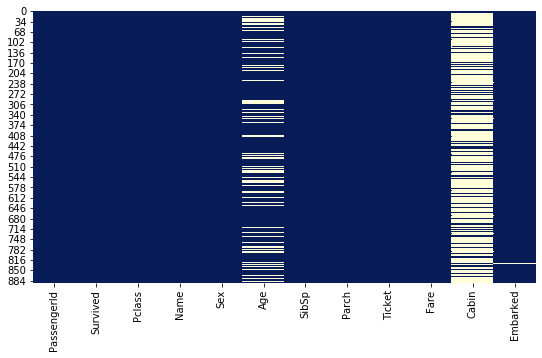

In [0]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

Признак «Cabin» имел 1014 пропущенных значений. Столбец «Embarked», который отображал пункт посадки пассажиров, имел всего 2 пропущенных значения. В признаке «Age» было 263 пропущенных значения, а в столбце «Fare» — одно.

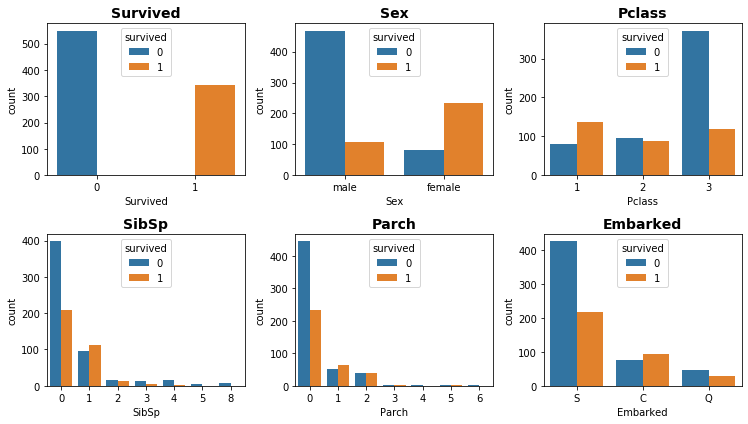

In [0]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df_train[cols[i]], hue=df_train["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 
        
plt.tight_layout() 

Из 891 пассажиров в df_test, менее чем в 350 выжилы.
Выжило больше женщин, чем мужчин.
Кроме того, шанс выжить намного выше в 1 и 2 классе, чем в 3.
Коэффициент выживаемости для пассажиров, путешествующих с SibSp или Parch, выше, чем для тех, кто путешествует в одиночку.
Пассажиры, отправившиеся в C и Q, с большей вероятностью выживут, чем пассажиры, отправившиеся в S.

----
Распределение возраста как функции класса, пола и выживших

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


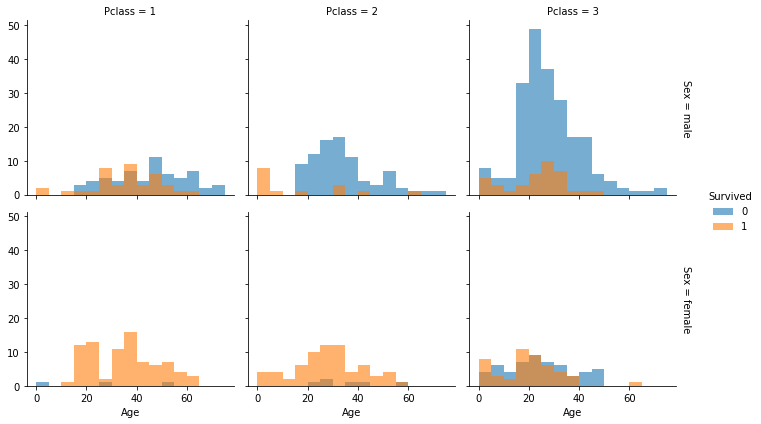

In [0]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

Из диаграм видно, что лучшие шансы выжить для пассажиров мужского пола были в классе 1 или в возрасте до 5 лет.
Самый низкий коэффициент выживаемости был у женщин-пассажиров в классе 3 и старше 40 лет.
Большинство пассажиров были мужчинами, в 3 классе и в возрасте от 15 до 35 лет.

----
Как мы знаем, выживаемость снижается с Pclass.
Параметр hue в sns.barplot позволяет нам увидеть разницу в выживаемости для мужчин и женщин.

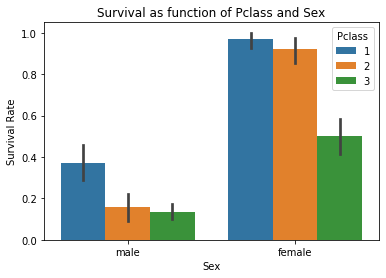

In [0]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

#### Перекодировка категориальных признаков

In [0]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
df_train.drop(columns=['Cabin'], inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
print(sum(df_train['Age'].isnull()))
print(len(df_train))

177
891


In [0]:
df_train.dropna(inplace=True)

In [0]:
df_train.drop(columns=['Name', 'PassengerId', 'Ticket'], inplace=True)

In [0]:
# df_train.drop(columns=['Ticket'], inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [0]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            print(column, result.dtypes[column])
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df_train) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data.head() 

Sex object
Embarked object


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
encoded_data.head(10) 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0
10,1,3,0,4.0,1,1,16.7000,2


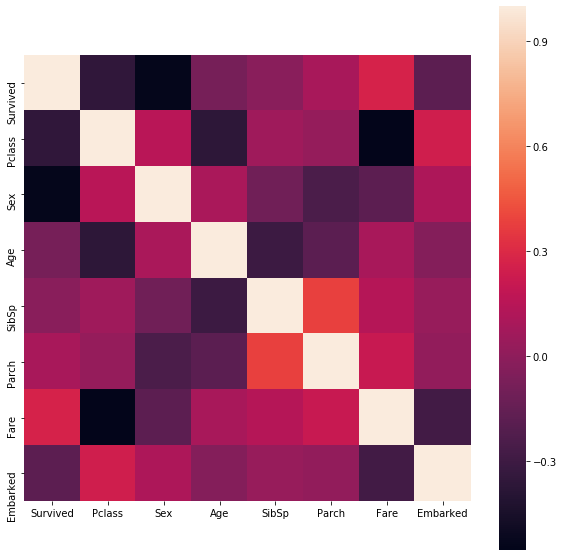

In [0]:
# тоже крутой модуль, для различной визуализации данных
import seaborn as sns

plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [0]:
X = encoded_data.drop(columns=['Survived']).values
y = encoded_data['Survived'].values

In [0]:
X

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 1.    ,  0.    , 19.    , ...,  0.    , 30.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  1.    ]])

In [0]:
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

Нормализуем данные

In [0]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [0]:
X_scaled

array([[ 0.90859974,  0.75613751, -0.52766856, ..., -0.50678737,
        -0.51637992,  0.51958818],
       [-1.48298257, -1.32251077,  0.57709388, ..., -0.50678737,
         0.69404605, -2.04948671],
       [ 0.90859974, -1.32251077, -0.25147795, ..., -0.50678737,
        -0.50362035,  0.51958818],
       ...,
       [-1.48298257, -1.32251077, -0.73481151, ..., -0.50678737,
        -0.08633507,  0.51958818],
       [-1.48298257,  0.75613751, -0.25147795, ..., -0.50678737,
        -0.08633507, -2.04948671],
       [ 0.90859974,  0.75613751,  0.16280796, ..., -0.50678737,
        -0.50692839, -0.76494927]])

Обучаем классификаторы

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#### KNN

In [0]:
# по аналогии поменяем количество точек для проверки разных значений параметра k - 11 точек в диапазоне от 15 до 35 (равные промежутки, int)
knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, knn_grid, cv=10)
gs.fit(X_scaled, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'n_neighbors': 7}, 0.8089887640449438)

In [0]:
# Функция отрисовки графиков

def grid_plot(x, y, x_label, title, y_label='roc_auc'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

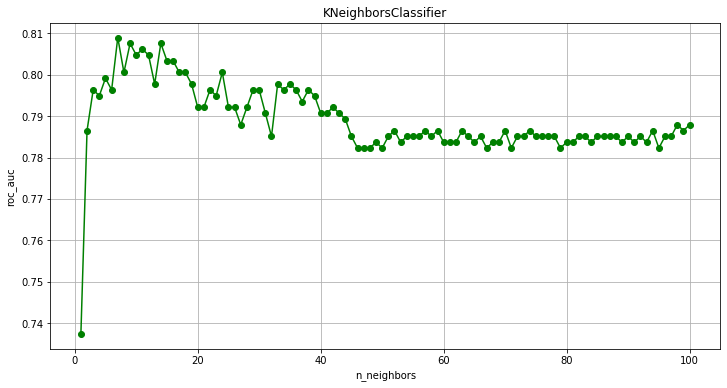

In [0]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

#### Дерево

In [0]:
# knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}

param_grid = {'min_samples_split': [i for i in range(2, 100)] }
alg = tree.DecisionTreeClassifier()
gs = GridSearchCV(alg, param_grid, cv=10)
gs.fit(X_scaled, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'min_samples_split': 25}, 0.8117977528089888)

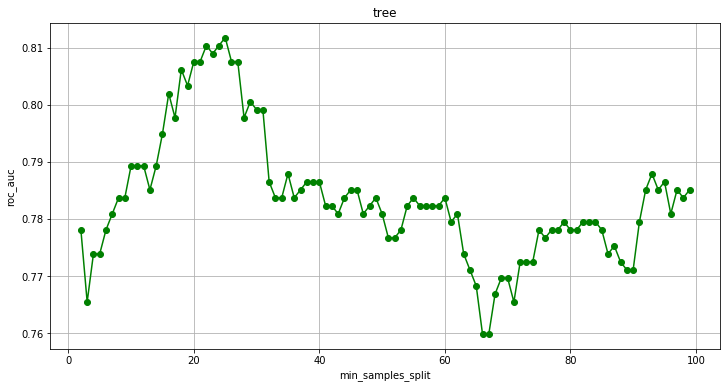

In [0]:
grid_plot(param_grid['min_samples_split'], gs.cv_results_['mean_test_score'], 'min_samples_split', 'tree')

#### Random forest

In [0]:
# knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}

param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 10)],
              'max_features': [2, len(X_scaled[0])-1]
              }

alg = RandomForestClassifier()
gs = GridSearchCV(alg, param_grid, cv=5)
gs.fit(X_scaled, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print()
gs.best_params_, gs.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

({'max_depth': 9, 'max_features': 6, 'min_samples_split': 8},
 0.824438202247191)

In [0]:
def plot_feature_importances(model, columns):
    nr_f = 10
    imp = pd.Series(data = model.best_estimator_.feature_importances_, 
                    index=columns).sort_values(ascending=False)
    plt.figure(figsize=(7,5))
    plt.title("Feature importance")
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')

Можно получить самые важные признаки

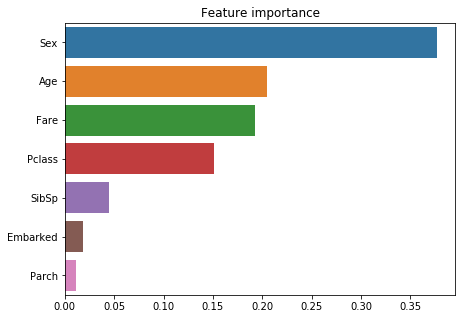

In [0]:
# encoded_data.columns
plot_feature_importances(gs, encoded_data.columns[1:])

#### KMeans

In [0]:
# knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}

param_grid = {'n_clusters': [i for i in range(2, 50)] }
alg = KMeans()
gs = GridSearchCV(alg, param_grid, cv=5)
gs.fit(X_scaled, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'n_clusters': 48}, -138.59416481594292)

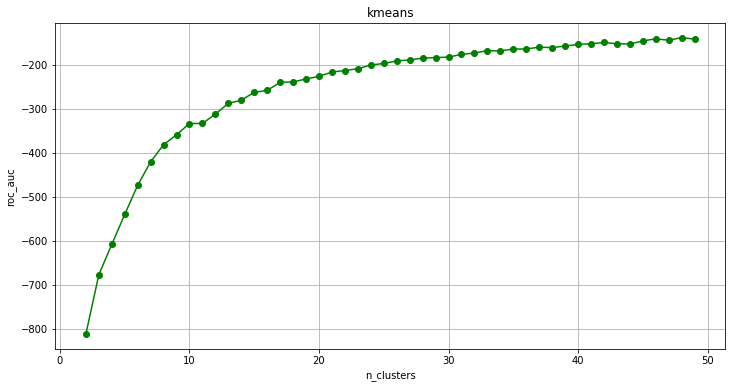

In [0]:
grid_plot(param_grid['n_clusters'], gs.cv_results_['mean_test_score'], 'n_clusters', 'kmeans')

#### Extra tree classifier

In [0]:
# knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}
import warnings
warnings.filterwarnings("ignore")

param_grid = {'max_depth': [i for i in range(2, 10)],
              'min_samples_split': [i for i in range(2, 10)],
              'min_samples_leaf': [i for i in range(1, 10)],
              'max_features': [2, len(X_scaled[0])-1]}
              
alg = RandomForestClassifier()
gs = GridSearchCV(alg, param_grid, cv=5)
gs.fit(X_scaled, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print()
gs.best_params_, gs.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

({'max_depth': 9,
  'max_features': 6,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 0.824438202247191)

In [0]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py